In [1]:
pip install geopandas pandas matplotlib folium

In [580]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

In [582]:
# Load the shapefile
shapefile_path = "shapefile"
USA_states = gpd.read_file(shapefile_path)

main_states = [
    "Alabama", "Arizona", "Arkansas", "California", "Colorado", 
               "Connecticut", "Delaware", "Florida", "Georgia", "Idaho", 
               "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", 
               "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", 
               "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
               "New Hampshire", "New Jersey", "New Mexico", "New York", 
               "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", 
               "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", 
               "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
               "West Virginia", "Wisconsin", "Wyoming"
]
# Filter for the 50 main states
usa_states = USA_states[USA_states['NAME'].isin(main_states)]

In [332]:
print(usa_states.count())

REGION      48
DIVISION    48
STATEFP     48
STATENS     48
GEOID       48
GEOIDFQ     48
STUSPS      48
NAME        48
LSAD        48
MTFCC       48
FUNCSTAT    48
ALAND       48
AWATER      48
INTPTLAT    48
INTPTLON    48
geometry    48
dtype: int64


In [584]:
# Load the data
household_income = pd.read_excel("Median household income.xlsx")
edu_attainment = pd.read_excel("Educational Attainment.xlsx")

# Display the first few rows of each dataset
print(household_income.head())
print(edu_attainment.head())

        State  Median household income
0     Alabama                    62212
1     Arizona                    77315
2    Arkansas                    58700
3  California                    95521
4    Colorado                    92911
        State  Population 25 years and over with a Bachelor's degree or higher
0     Alabama                                            1010840              
1     Arizona                                            1726116              
2    Arkansas                                             544020              
3  California                                           10110325              
4    Colorado                                            1920057              


In [586]:
# Rename columns for easier merging 
household_income.columns = ['State', 'Median_Income']
edu_attainment.columns = ['State', 'Population']

# Merge the datasets on the 'State' column
merged_data = pd.merge(edu_attainment, household_income, on='State')

# Display the merged data
print(merged_data.head())

        State  Population  Median_Income
0     Alabama     1010840          62212
1     Arizona     1726116          77315
2    Arkansas      544020          58700
3  California    10110325          95521
4    Colorado     1920057          92911


In [588]:
usa_states = usa_states.rename(columns={'NAME': 'State'})
print(usa_states.head())  # Display the first few rows to verify the change

  REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS          State  \
0      3        5      54  01779805    54  0400000US54     WV  West Virginia   
1      3        5      12  00294478    12  0400000US12     FL        Florida   
2      2        3      17  01779784    17  0400000US17     IL       Illinois   
3      2        4      27  00662849    27  0400000US27     MN      Minnesota   
4      3        5      24  01714934    24  0400000US24     MD       Maryland   

  LSAD  MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0   00  G4000        A   62266513826    488918898  +38.6472854  -080.6183274   
1   00  G4000        A  138965379385  45968913048  +28.3989775  -082.5143005   
2   00  G4000        A  143778206717   6216848695  +40.1028754  -089.1526108   
3   00  G4000        A  206244791203  18937236061  +46.3159573  -094.1996043   
4   00  G4000        A   25151223822   6979843236  +38.9466584  -076.6744939   

                                      

In [592]:
merged_geo_data = usa_states.merge(merged_data, left_on='State', right_on='State')


In [344]:
merged_geo_data.head

<bound method NDFrame.head of    REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS  \
0       3        5      54  01779805    54  0400000US54     WV   
1       3        5      12  00294478    12  0400000US12     FL   
2       2        3      17  01779784    17  0400000US17     IL   
3       2        4      27  00662849    27  0400000US27     MN   
4       3        5      24  01714934    24  0400000US24     MD   
5       1        1      44  01219835    44  0400000US44     RI   
6       4        8      16  01779783    16  0400000US16     ID   
7       1        1      33  01779794    33  0400000US33     NH   
8       3        5      37  01027616    37  0400000US37     NC   
9       1        1      50  01779802    50  0400000US50     VT   
10      1        1      09  01779780    09  0400000US09     CT   
11      3        5      10  01779781    10  0400000US10     DE   
12      4        8      35  00897535    35  0400000US35     NM   
13      4        9      06  01779778    06  04

In [594]:
print(merged_data.head())  # Check the DataFrame containing household income

        State  Population  Median_Income
0     Alabama     1010840          62212
1     Arizona     1726116          77315
2    Arkansas      544020          58700
3  California    10110325          95521
4    Colorado     1920057          92911


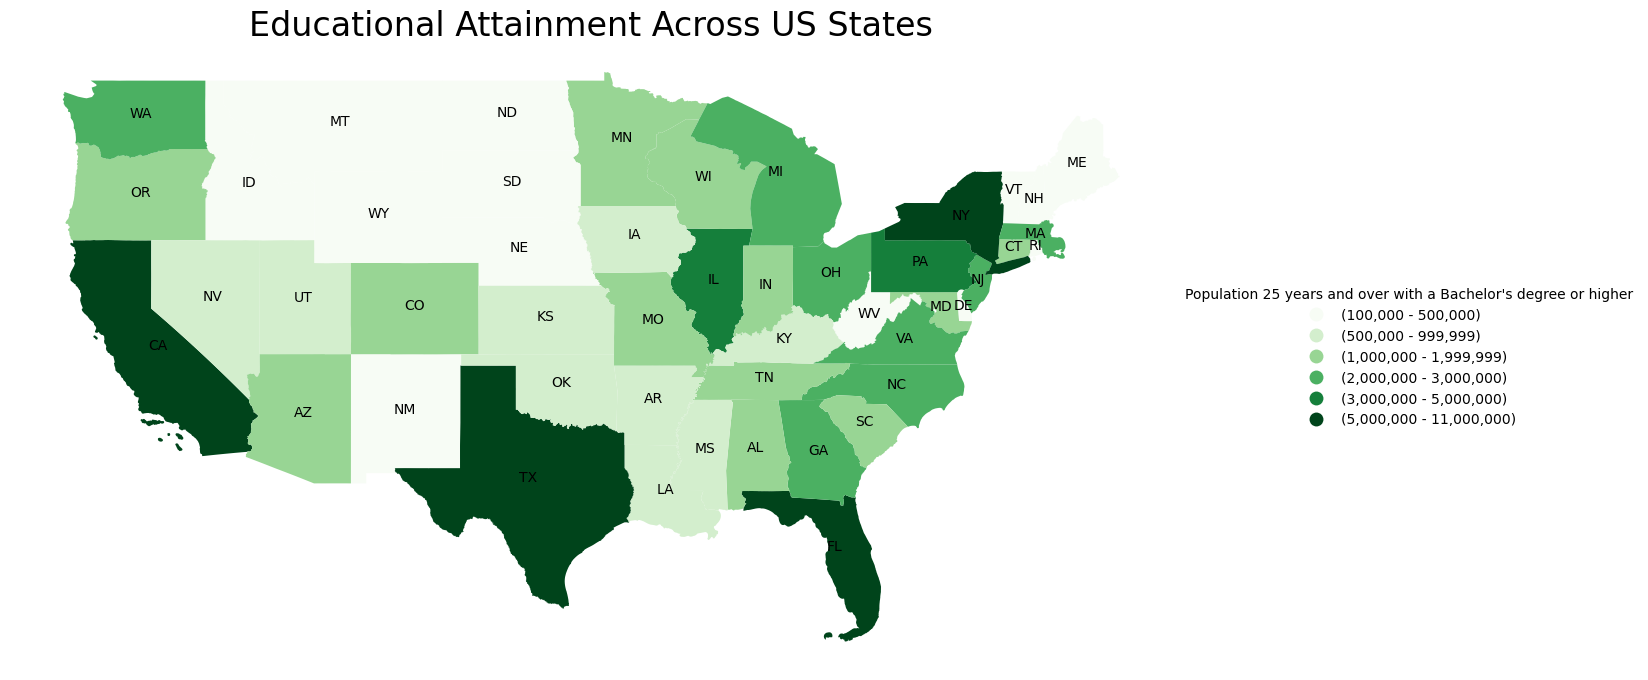

In [446]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Create a function to categorize the population and map to color ranges
def categorize_population(population):
    if 100000 <= population <= 499999:
        return "(100,000 - 500,000)"
    elif 500000 <= population <= 999999:
        return "(500,000 - 999,999)"
    elif 1000000 <= population <= 1999999:
        return "(1,000,000 - 1,999,999)"
    elif 2000000 <= population <= 2999999:
        return "(2,000,000 - 3,000,000)"
    elif 3000000 <= population <= 4999999:
        return "(3,000,000 - 5,000,000)"
    elif 5000000 <= population <= 11000000:
        return "(5,000,000 - 11,000,000)"
    else:
        return None  # Outside defined ranges

# Apply categorization
merged_geo_data['Pop_Category'] = merged_geo_data['Population'].apply(categorize_population)
# Define the order for the categories
category_order = [
    "(100,000 - 500,000)",
    "(500,000 - 999,999)",
    "(1,000,000 - 1,999,999)",
    "(2,000,000 - 3,000,000)",
    "(3,000,000 - 5,000,000)",
    "(5,000,000 - 11,000,000)"
]
# Convert the 'Pop_Category' column to a Categorical type with ordered categories
merged_geo_data['Pop_Category'] = pd.Categorical(
    merged_geo_data['Pop_Category'],
    categories=category_order,
    ordered=True
)
    
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_geo_data.plot(column='Pop_Category', cmap='Greens', ax=ax, legend=True,
                     legend_kwds={'title': "Population 25 years and over with a Bachelor's degree or higher",
                                  'loc': 'center left', 'bbox_to_anchor': (1, 0.5),
                                  'frameon': False})

# Add labels for each state
for idx, row in merged_geo_data.iterrows():
    # Extract geometry center (may need adjustment for states with complex geometries)
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(x, y, row['STUSPS'], ha='center', fontsize=10, color='black')

plt.title('Educational Attainment Across US States', fontsize=24)
plt.axis('off')  # Turn off axis
plt.show()


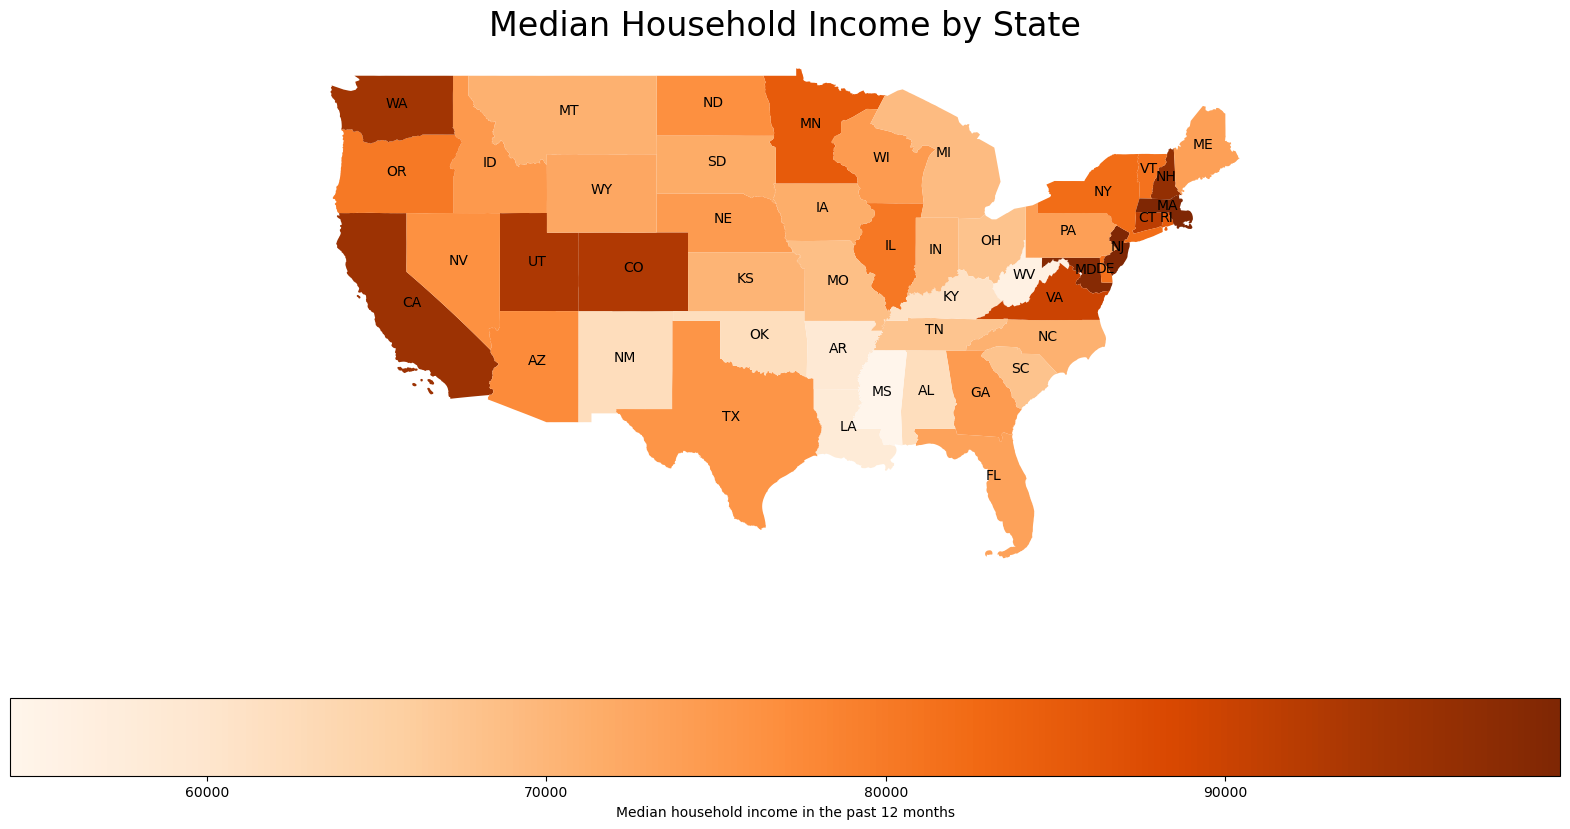

<Figure size 640x480 with 0 Axes>

In [688]:

# Create a function to categorize the income and map to colors
def categorize_income(income):
    if 54000 <= income <= 64999:
        return "(54,000–64,999)"
    elif 65000 <= income <= 74999:
        return "(65,000–74,999)"
    elif 75000 <= income <= 84999:
        return "(75,000–84,999)"
    elif 85000 <= income <= 94999:
        return "(85,000–94,999)"
    elif 95000 <= income <= 98999:
        return "(95,000–98,999)"
    elif 99000 <= income <= 99999:
        return "(99,000–99,999)"
    else:
        return None  # Outside defined ranges

# Apply categorization
merged_geo_data['Income_Range'] = merged_geo_data['Median_Income'].apply(categorize_income)
merged_geo_data['Color'] = merged_geo_data['Income_Range'].map(income_ranges)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged_geo_data.plot(column='Median_Income', cmap='Oranges', ax=ax, legend=True,
                     legend_kwds={'label': "Median household income in the past 12 months",
                                  'orientation': "horizontal"
                                  })
# Add labels for each state
#Add state labels (STUSPS)
for idx, row in merged_geo_data.iterrows():
    # Extract geometry center (may need adjustment for states with complex geometries)
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(x, y, row['STUSPS'], ha='center', fontsize=10, color='black')
    
plt.title('Median Household Income by State', fontsize=24)
plt.axis('off')  # Turn off axis
plt.show()
plt.savefig("median_household_income_by_state.png")  


In [596]:
# Load the data
insurance_cov= pd.read_excel("Health Insurance .xlsx")
print(insurance_cov.head())
insurance_cov.columns = ['State', ' Insrance_Coverage']


        State  Health Insurance Coverage Rate
0     Alabama                         5022427
1      Alaska                          702315
2     Arizona                         7321507
3    Arkansas                         3013015
4  California                        38495524


In [598]:
insurance_cov.columns = insurance_cov.columns.str.strip()
print(insurance_cov.columns)


Index(['State', 'Insrance_Coverage'], dtype='object')


In [600]:
usa_states.rename(columns={'NAME': 'State'}, inplace=True)
insurance_cov.rename(columns={'state': 'State'}, inplace=True)

print(usa_states.columns)
print(insurance_cov.columns)

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'GEOIDFQ',
       'STUSPS', 'State', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')
Index(['State', 'Insrance_Coverage'], dtype='object')


In [602]:
merged_geo_data2 = usa_states.merge(insurance_cov, left_on='State', right_on='State')


In [542]:
merged_geo_data2

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,State,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Insrance_Coverage
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",1736140
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",22276397
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",12378557
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244791203,18937236061,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",5678023
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151223822,6979843236,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334...",6087312
5,1,1,44,01219835,44,0400000US44,RI,Rhode Island,00,G4000,A,2677768885,1323681453,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",1079737
6,4,8,16,01779783,16,0400000US16,ID,Idaho,00,G4000,A,214050504522,2390996667,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0...",1938023
7,1,1,33,01779794,33,0400000US33,NH,New Hampshire,00,G4000,A,23190211616,1025871482,+43.6727945,-071.5841886,"POLYGON ((-70.83887 43.24449, -70.83886 43.244...",1386016
8,3,5,37,01027616,37,0400000US37,NC,North Carolina,00,G4000,A,125935965771,13453455061,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.5446, -77.89942 36.5446...",10623208
9,1,1,50,01779802,50,0400000US50,VT,Vermont,00,G4000,A,23872594714,1030642813,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.0418 44.1566...",642064


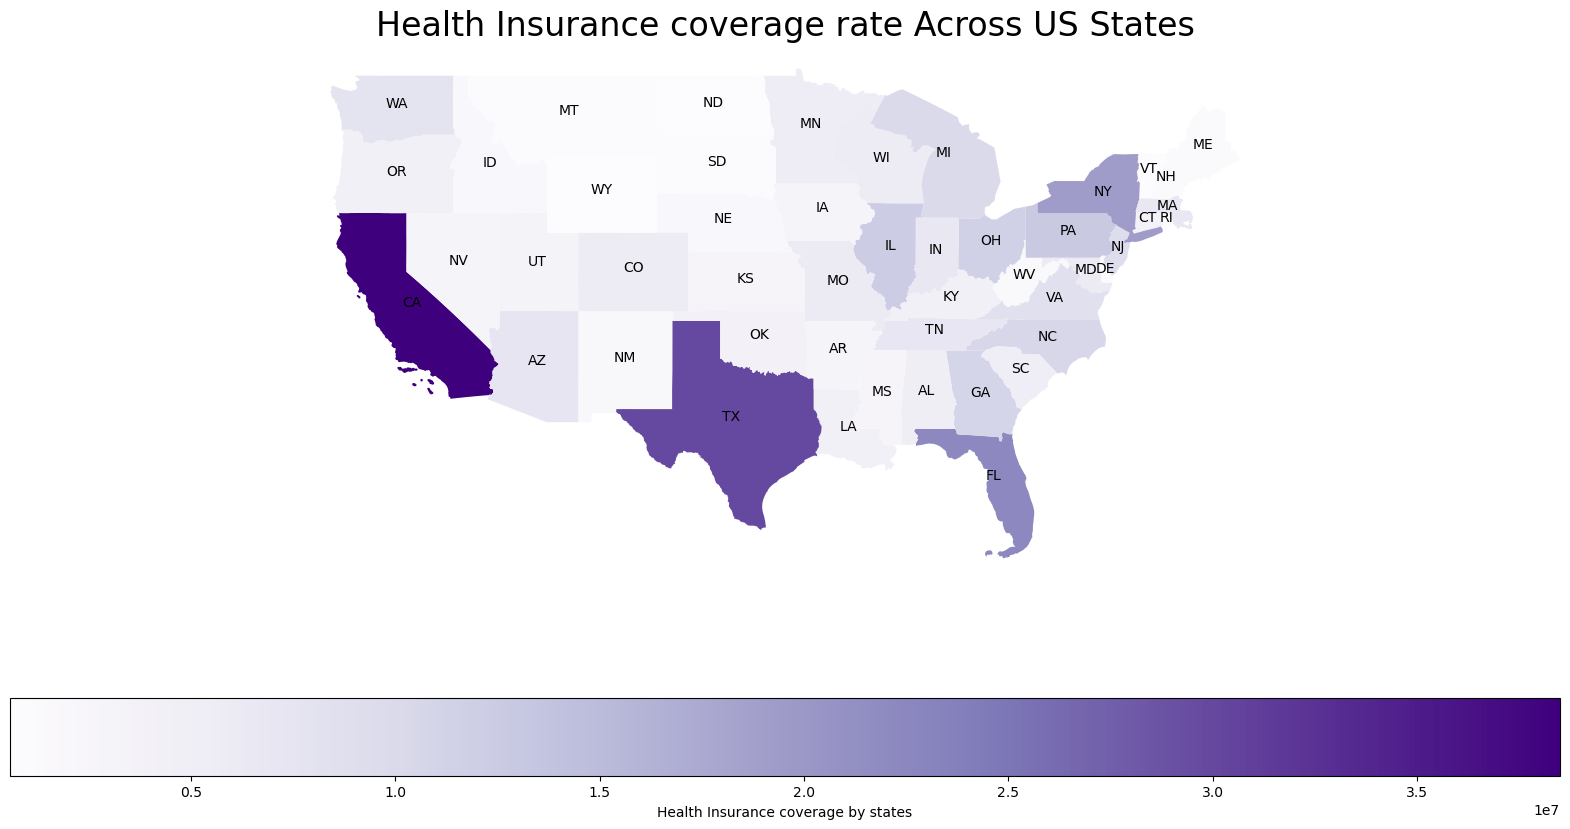

In [560]:
# Create a function to categorize the population and map to color ranges
def categorize_insurance(insurance):
    if 200000 <= insurance <= 999999:
        return "(200,000 - 1,000,000)"
    elif 1000000 <= insurance <= 1999999:
        return "(1,000,000 - 2,000,000)"
    elif 2000000 <= insurance <= 4999999:
        return "(2,000,000 - 5,000,000)"
    elif 5000000 <= insurance <= 9999999:
        return "(5,000,000 - 10,000,000)"
    elif 10000000 <= insurance <= 19999999:
        return "(10,000,000 - 20,000,000)"
    elif 20000000 <= insurance <= 40000000:
        return "(20,000,000 - 40,000,000)"
    else:
        return None  # Outside defined ranges

# Apply categorization
merged_geo_data2['Health_Category'] = merged_geo_data2['Insrance_Coverage'].apply(categorize_insurance)

# Convert the 'Pop_Category' column to a Categorical type with ordered categories
merged_geo_data2['Health_Category'] = pd.Categorical(
    merged_geo_data2['Health_Category'],
    categories=category_order,
    ordered=True
)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged_geo_data2.plot(column='Insrance_Coverage', cmap='Purples', ax=ax, legend=True,
                       legend_kwds={'label': "Health Insurance coverage by states",
                                    'orientation': "horizontal"})

# Add labels for each state
for idx, row in merged_geo_data2.iterrows():
    # Extract geometry center (may need adjustment for states with complex geometries)
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(x, y, row['STUSPS'], ha='center', fontsize=10, color='black')

plt.title('Health Insurance coverage rate Across US States', fontsize=24)
plt.axis('off')  # Turn off axis
plt.show()


In [616]:

df1 = pd.read_excel("Median household income.xlsx")
df2 = pd.read_excel("Educational Attainment.xlsx")
df3 = pd.read_excel("Health Insurance .xlsx")


df1.columns = ['State', 'Median_Income']
df2.columns = ['State', 'Population']
df3.columns = ['State', 'Insurance_Coverage']

print(df1.head())
print(df2.head())
print(df3.head())




        State  Median_Income
0     Alabama          62212
1     Arizona          77315
2    Arkansas          58700
3  California          95521
4    Colorado          92911
        State  Population
0     Alabama     1010840
1     Arizona     1726116
2    Arkansas      544020
3  California    10110325
4    Colorado     1920057
        State  Insurance_Coverage
0     Alabama             5022427
1      Alaska              702315
2     Arizona             7321507
3    Arkansas             3013015
4  California            38495524


In [626]:
# First, merge df1 and df2
merged_1_2 = pd.merge(df1, df2, on='State')

# Then, merge the result with df3
merged_info = pd.merge(merged_1_2, df3, on='State')

# Display the first few rows of the merged DataFrame
print(merged_info.head())

        State  Median_Income  Population  Insurance_Coverage
0     Alabama          62212     1010840             5022427
1     Arizona          77315     1726116             7321507
2    Arkansas          58700      544020             3013015
3  California          95521    10110325            38495524
4    Colorado          92911     1920057             5776484


In [646]:
merged_info

,State,Median_Income,Population,Insurance_Coverage,Cluster,Cluster_Encoded
0,Alabama,62212,1010840,5022427,0,1
1,Arizona,77315,1726116,7321507,0,1
2,Arkansas,58700,544020,3013015,0,1
3,California,95521,10110325,38495524,1,2
4,Colorado,92911,1920057,5776484,2,0
5,Connecticut,91665,1098315,3573821,2,0
6,Delaware,81361,266702,1017865,0,1
7,Florida,73311,5733894,22276397,1,2
8,Georgia,74632,2637795,10832829,0,1
9,Idaho,74942,419687,1938023,0,1


In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
import geopandas as gpd
from scipy import stats

In [666]:
# Sample DataFrame
data = {
    'State': ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
              'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
              'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
              'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
              'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Median_Income': [62212, 77315, 58700, 95521, 92911, 91665, 81361, 73311, 74632, 74942, 80306, 69477, 71433, 70333, 
                      61118, 58229, 73733, 98678, 99858, 69183, 85086, 54203, 68545, 70804, 74590, 76364, 96838, 99781, 62268, 
                      82095, 70804, 76525, 67769, 62138, 80160, 73824, 84972, 67804, 71810, 67631, 75780, 93421, 81211, 89931, 
                      94605, 55948, 74631, 72415],
    'Population': [1010840, 1726116, 544020, 10110325, 1920057, 1098315, 266702, 5733894, 2637795, 419687, 3334374, 1394398, 
                   683500, 700713, 865265, 837518, 384543, 1880000, 2377209, 2289862, 1576206, 505672, 1413984, 275535, 461280, 
                   647151, 420101, 2850285, 465561, 5642907, 2754921, 174474, 2618045, 770810, 1148638, 3241343, 307099, 1232848, 
                   204967, 1562612, 6858406, 800376, 205807, 2561362, 2229338, 302079, 1389399, 122876],
    'Insurance_Coverage': [5022427, 7321507, 3013015, 38495524, 5776484, 3573821, 1017865, 22276397, 10832829, 1938023, 12378557, 
                           6764280, 3162048, 2876621, 4442248, 4477873, 1378322, 6087312, 6934075, 9931639, 5678023, 2874290, 6094536, 
                           1115486, 1951731, 3154027, 1386016, 9204137, 2076456, 19372405, 10623208, 763538, 11616141, 3967096, 
                           4193025, 12779387, 1079737, 5276214, 900264, 7033220, 30020476, 3391381, 642064, 8489257, 7693927, 1736140, 
                           5851267, 573746],
}
# Convert to DataFrame
df = pd.DataFrame(data)

print(df)



             State  Median_Income  Population  Insurance_Coverage
0          Alabama          62212     1010840             5022427
1          Arizona          77315     1726116             7321507
2         Arkansas          58700      544020             3013015
3       California          95521    10110325            38495524
4         Colorado          92911     1920057             5776484
5      Connecticut          91665     1098315             3573821
6         Delaware          81361      266702             1017865
7          Florida          73311     5733894            22276397
8          Georgia          74632     2637795            10832829
9            Idaho          74942      419687             1938023
10        Illinois          80306     3334374            12378557
11         Indiana          69477     1394398             6764280
12            Iowa          71433      683500             3162048
13          Kansas          70333      700713             2876621
14        

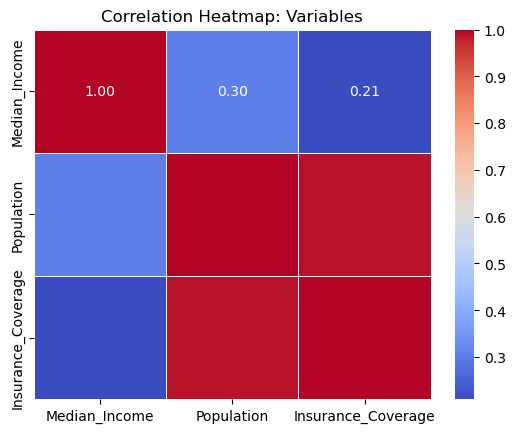

                            OLS Regression Results                            
Dep. Variable:     Insurance_Coverage   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2279.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           5.99e-46
Time:                        04:05:57   Log-Likelihood:                -716.10
No. Observations:                  48   AIC:                             1438.
Df Residuals:                      45   BIC:                             1444.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.76e+06    7.1e+05      6.705

In [682]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Sample DataFrame (as given in your example)
data = {
    'State': ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
              'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
              'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
              'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
              'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Median_Income': [62212, 77315, 58700, 95521, 92911, 91665, 81361, 73311, 74632, 74942, 80306, 69477, 71433, 70333, 
                      61118, 58229, 73733, 98678, 99858, 69183, 85086, 54203, 68545, 70804, 74590, 76364, 96838, 99781, 62268, 
                      82095, 70804, 76525, 67769, 62138, 80160, 73824, 84972, 67804, 71810, 67631, 75780, 93421, 81211, 89931, 
                      94605, 55948, 74631, 72415],
    'Population': [1010840, 1726116, 544020, 10110325, 1920057, 1098315, 266702, 5733894, 2637795, 419687, 3334374, 1394398, 
                   683500, 700713, 865265, 837518, 384543, 1880000, 2377209, 2289862, 1576206, 505672, 1413984, 275535, 461280, 
                   647151, 420101, 2850285, 465561, 5642907, 2754921, 174474, 2618045, 770810, 1148638, 3241343, 307099, 1232848, 
                   204967, 1562612, 6858406, 800376, 205807, 2561362, 2229338, 302079, 1389399, 122876],
    'Insurance_Coverage': [5022427, 7321507, 3013015, 38495524, 5776484, 3573821, 1017865, 22276397, 10832829, 1938023, 12378557, 
                           6764280, 3162048, 2876621, 4442248, 4477873, 1378322, 6087312, 6934075, 9931639, 5678023, 2874290, 6094536, 
                           1115486, 1951731, 3154027, 1386016, 9204137, 2076456, 19372405, 10623208, 763538, 11616141, 3967096, 
                           4193025, 12779387, 1079737, 5276214, 900264, 7033220, 30020476, 3391381, 642064, 8489257, 7693927, 1736140, 
                           5851267, 573746],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# 4. Correlation Heatmap for the variables in the dataset
correlation_matrix = df[['Median_Income', 'Population', 'Insurance_Coverage']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Variables')
plt.show()

# Apply OLS Regression: Check for multicollinearity and heteroscedasticity
X = df[['Median_Income', 'Population']]
X = sm.add_constant(X)  # Adding constant to the model
y = df['Insurance_Coverage']

# OLS regression
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())
